# Chapter 2.1 _ Keras

https://www.youtube.com/watch?v=Oe0-hX4KSZQ&index=23&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN

https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class06_backpropagation.ipynb

https://www.heatonresearch.com/aifh/vol3/

# Backpropagation

Backpropagation is the primary means by which a neural network's weights are determined during training. Backpropagation works by calculating a weight change amount ($v_t$) for every weight($\theta$, theata) in the neural network. This value is subtracted from every weight by the following equation:<br>
<img src="https://render.githubusercontent.com/render/math?math=%5Ctheta_t%20%3D%20%5Ctheta_%7Bt-1%7D%20-%20v_t&mode=inline"><br>
This process is repeated for every iteration($t$). How the weight change is calculated depends on the training algorithm. Classic backpropagation simply calculates a gradient ($\nabla$, nabla) for every weight in the neural network with respect to the error function ($J$) of the neural network. The gradient is scaled by a learning rate ($\eta$, eta).<br>
<img src="https://render.githubusercontent.com/render/math?math=v_t%20%3D%20%5Ceta%20%5Cnabla_%7B%5Ctheta_%7Bt-1%7D%7D%20J%28%5Ctheta_%7Bt-1%7D%29&mode=inline"><br>
The learning rate is an important concept for backpropagation training. Setting the learning rate can be complex:
- Too low of a learning rate will usually converge to a good solution; however, the process will be very slow.
- Too high of a learning rate will either fail outright, or converge to a higher error than a better learning rate.

# Momentum Backpropagation
Momentum adds another term to the calculation of $v_t$:< br>
$ v_t = \eta \nabla_{\theta_{t-1}} J(\theta_{t-1}) + \lambda v_{t-1} $  <br>
Like the learning rate, momentum adds another training parameter that scales the effect of momentum. Momentum backpropagation has two training parameters: learning rate ($\eta$, eta) and momentum ($\lambda$, lambda). Momentum simply adds the scaled value of the previous weight change amount ($v_{t-1}$) to the current weight change amount($v_t$).<br>
Common values for learning rate are: 0.1, 0.01, 0.001, etc.<br>
This has the effect of adding additional force behind a direction a weight was moving. This might allow the weight to escape a local minima.<br>
A very common value for momentum is 0.9.

# Batch and Online Backpropagation

- <b>Online Training</b> - Update the weights based on gradients calculated from a single training set element.
- <b>Batch Training</b> - Update the weights based on the sum of the gradients over all training set elements.
- <b>Batch Size</b>- Update the weights based on the sum of some batch size of training set elements.
- <b>Mini-Batch Training</b>-  The same as batch size, but with a very small batch size. Mini-batches are very popular and they are often in the 32-64 element range.

Because the batch size is smaller than the complete training set size, it may take several batches to make it completely through the training set.
- <b>Step/Iteration</b> - The number of batches that were processed.
- <b>Epoch</b> - The number of times the complete training set was processed.

# Stochastic Gradient Descent
Stochastic gradient descent (SGD) is currently one of the most popular neural network training algorithms. It works very similarly to Batch/Mini-Batch training, except that the batches are made up of a random set of training elements.<br>
Advantages to SGD include:
- Computationally efficient. Even with a very large training set, each training step can be relatively fast.
- Decreases overfitting by focusing on only a portion of the training set each step.

# Other Techniques
One problem with simple backpropagation training algorithms is that they are highly sensative to learning rate and momentum. This is difficult because:
- Learning rate must be adjusted to a small enough level to train an accurate neural network.
- Momentum must be large enough to overcome local minima, yet small enough to not destabilize the training.
- <b>A single learning rate/momentum is often not good enough for the entire training process. It is often useful to automatically decrease learning rate as the training progresses.</b>
- All weights share a single learning rate/momentum.<br>

Other training techniques:
- <b>Resilient Propagation</b> - Use only the magnitude of the gradient and allow each neuron to learn at its own rate. No need for learning rate/momentum; however, only works in full batch mode.
- <b>Nesterov accelerated gradient</b> - Helps mitigate the risk of choosing a bad mini-batch.
- <b>Adagrad</b> - Allows an automatically decaying per-weight learning rate and momentum concept.
- <b>Adadelta</b> - Extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate.
- <font color='red' ><b>Non-Gradient Methods</b></font> - Non-gradient methods can sometimes be useful, though rarely outperform gradient-based backpropagation methods.<b> These include: simulated annealing, genetic algorithms, particle swarm optimization, Nelder Mead, and many more.</b>

# ADAM Update
ADAM is the first training algorithm you should try. It is very effective. Kingma and Ba (2014) introduced the Adam update rule that derives its name from the adaptive moment estimates that it uses. Adam estimates the first (mean) and second (variance) moments to determine the weight corrections. Adam begins with an exponentially decaying average of past gradients (m):<br>
$ m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t $

This average accomplishes a similar goal as classic momentum update; however, its value is calculated automatically based on the current gradient ($g_t$). The update rule then calculates the second moment ($v_t$):<br>
$ v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2 $

The values $m_t$ and $v_t$ are estimates of the first moment (the mean) and the second moment (the uncentered variance) of the gradients respectively. However, they will have a strong bias towards zero in the initial training cycles. The first moment’s bias is corrected as follows.<br>
$ \hat{m}_t = \frac{m_t}{1-\beta^t_1} $ <br>
Similarly, the second moment is also corrected:<br>
$ \hat{v}_t = \frac{v_t}{1-\beta_2^t} $ <br>
These bias-corrected first and second moment estimates are applied to the ultimate Adam update rule, as follows:<br>
$ \theta_t = \theta_{t-1} - \frac{\alpha \cdot \hat{m}_t}{\sqrt{\hat{v}_t}+\eta} \hat{m}_t $

Adam is very tolerant to initial learning rate (\alpha) and other training parameters. Kingma and Ba (2014) propose default values of 0.9 for $\beta_1$, 0.999 for $\beta_2$, and 10-8 for $\eta$.

### Specifying the Update Rule in Tensorflow:
TensorFlow allows the update rule to be set to one of:
- Adagrad
- Adam
- Ftrl
- Momentum
- RMSProp
- SGD

### Important Parameters
- learning_rate - How quickly should the optimizer attempt to train the neural network. Too high will fail to train. Too low will train too slowly.
- momentum - Only used with the momentum optimizer. How much of the previous weight change direction should be used in the current step.
- every_n_steps - How often should the validation set be evaluated.
- early_stopping_rounds - How many rounds (steps) of non-improvement should be tolerated.

### Some results:
> <b>ADAM</b>, learning_rate = 1e-1, early_stopping = 100<br>
Score (RMSE): 3.5879969596862793<br>
Best step: 1505, Last successful step: 1640

> <b>ADAM</b>, learning_rate = 1e-3, early_stopping = 100<br>
Score (RMSE): 2.4205124378204346 <br>
Best step: 4650, Last successful step: 4770

> <b>ADAM</b>, default learning rate, early_stopping = 1000<br>
Score (RMSE): 2.410527467727661 <br>
Best step: 6630, Last successful step: 7720

> <b>Momentum</b>, learning_rate=1e-5,momentum=0.9, early_stopping = 1000 <br>
Score (RMSE): 2.4050464630126953 <br>
Best step: 41270, Last successful step: 42280

ADAM will converge quicker (fewer steps) than momentum and get a good RMSE. For all, it is important to allow enough early_stopping steps to find a good solution.

# Check Result

In [30]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#from tensorflow.keras.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.logging import set_verbosity, ERROR

from farhad_DL.utils import TimeSummary, plot_training_summary
from farhad_DL.utility import to_xy, chart_regression
from farhad_DL.utility import encode_text_dummy, missing_median

In [17]:
def unlinear_regression():
    model = Sequential()
    
    model.add(Dense(20,activation='relu',input_dim=x.shape[1]))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1))
    
    return model

In [18]:
# LOAD DATA
df_mpg = pd.read_csv('data/auto-mpg.csv',na_values=['NA','?'])

# ready data
missing_median(df_mpg,'horsepower')
encode_text_dummy(df_mpg,'origin')
df_mpg.drop('name',1,inplace=True)

# Encode to a 2D matrix for training
x,y = to_xy(df_mpg,'mpg')

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

Test loss: 13.27122013092041
Test accuracy: 0.07


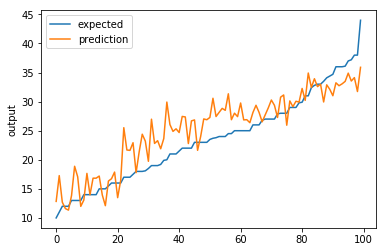

In [38]:
set_verbosity(ERROR)
model = unlinear_regression()

model.compile(optimizer="adam",
             loss="mean_squared_error"
             , metrics=['accuracy'])
time_summary = TimeSummary()
monitor = EarlyStopping(monitor='val_process', min_delta=1e-3, patience=5, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True)

summary = model.fit(x_train, y_train, 
                    validation_split=0.2, 
                    callbacks=[time_summary,monitor, checkpointer],
                    verbose=0,
                    batch_size=10, 
                    epochs=200 )# validation_split=0.2, validation_data=(x_test,y_test), 

score = model.evaluate(x_test,y_test,verbose=0)
pred = model.predict(x_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
chart_regression(pred.flatten(),y_test)

In [39]:
rme = np.sqrt(mean_squared_error(pred.flatten(),y_test))

print("Score (RMSE): {}".format(rme))

Score (RMSE): 3.6429684162139893
